# Humor Type Persona Prompt Engineering

Given the strong performance of the Gemma 2 model during prior experiments, we decided to prompt the model to embody an individual who enjoys a specific category of humor.

The humor categories presented were aggressive, self-enhancing, self-deprecating, dark, and affiliative humor. However, when evaluated with the proposed metric, the prompt with no specialization in humor preformed the best, with humor-specific prompts falling between 31-33%. These findings suggest that humor-specialized prompts do not enhance the model's performance in humor detection.

## Imports

In [1]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [3]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma2 = pd.read_csv("/home/ada/humor/data/stand_up_dataset/gemma2_humor_types - gemma2 - gemma2.csv")

In [11]:
humor_types = ["none", "aggressive", "self-enhancing", "self-deprecating", "dark", "affiliative"]
gemma2_metric = {}

for humor_type in humor_types:
    gemma2_filtered = gemma2[gemma2['humor'] == humor_type]
    gemma2_metric[humor_type] = bipartite_metric(gemma2_filtered, ground_truth)

none_metric = gemma2_metric["none"]
print("No Humor Type:", none_metric.select_dtypes(include='number').mean())

aggressive_metric = gemma2_metric["aggressive"]
print("Aggressive Humor Type:", aggressive_metric.select_dtypes(include='number').mean())

self_enhancing_metric = gemma2_metric["self-enhancing"]
print("Self-enhancing Humor Type:", self_enhancing_metric.select_dtypes(include='number').mean())

self_deprecating_metric = gemma2_metric["self-deprecating"]
print("Self-deprecating Humor Type::", self_deprecating_metric.select_dtypes(include='number').mean())

dark_metric = gemma2_metric["dark"]
print("Dark Humor Type:", dark_metric.select_dtypes(include='number').mean())

affiliative_metric = gemma2_metric["affiliative"]
print("Affliliative Humor Type:", affiliative_metric.select_dtypes(include='number').mean())

No Humor Type: score    35.184287
dtype: float64
Aggressive Humor Type: score    32.67298
dtype: float64
Self-enhancing Humor Type: score    31.252205
dtype: float64
Self-deprecating Humor Type:: score    32.013752
dtype: float64
Dark Humor Type: score    32.833107
dtype: float64
Affliliative Humor Type: score    31.636608
dtype: float64


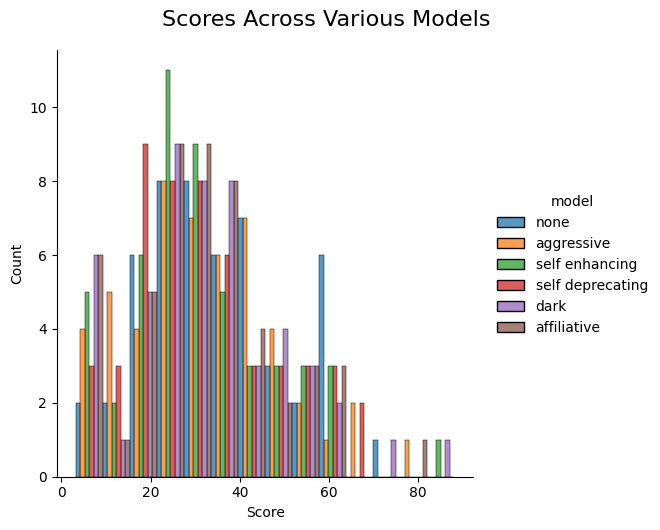

In [12]:
gemma = none_metric.assign(model="none")
aggressive = aggressive_metric.assign(model="aggressive")
enhance = self_enhancing_metric.assign(model = "self enhancing")
dep = self_deprecating_metric.assign(model = "self deprecating")
dark = dark_metric.assign(model = "dark")
aff = affiliative_metric.assign(model = "affiliative")

df = pd.concat([gemma, aggressive, enhance, dep, dark, aff]).reset_index(drop=True)
plot = sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plot.fig.suptitle("Scores Across Various Models", fontsize=16, y=1.05)  
plot.set_axis_labels("Score", "Count")  

plot.savefig("experiment_02.png")
plt.show()